In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("E:/Hospital_Readmission_Prediction/data/raw/diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [7]:
df['readmitted'] = df['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0})
df['readmitted'] = df['readmitted'].astype(int)
df['readmitted'].value_counts()

C:\Users\Dell\AppData\Local\Temp\ipykernel_30368\583789706.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted'] = df['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0})


readmitted
0    90409
1    11357
Name: count, dtype: int64

In [ ]:
medication_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
    'miglitol', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'
]

# Total Medications
df['total_medications'] = df[medication_cols].apply(lambda x: x.ne('No').sum(), axis=1)

# Number of Medication Changes
# Consider 'Up', 'Down', 'Steady' as changes
df['num_med_changes'] = df[medication_cols].apply(lambda x: x.isin(['Up','Down','Steady']).sum(), axis=1)

# Age numeric mapping
age_map = {
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35,
    '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75,
    '[80-90)': 85, '[90-100)': 95
}
df['age_numeric'] = df['age'].map(age_map)

# Group rare medical specialties (<1% frequency)
freq = df['medical_specialty'].value_counts(normalize=True)
rare_specialties = freq[freq < 0.01].index
df['medical_specialty_grouped'] = df['medical_specialty'].replace(rare_specialties, 'Other')

# iagnosis category
# Here we just categorize ICD codes broadly as strings
def diag_category(diag):
    if pd.isna(diag) or diag == '?':
        return 'Unknown'
    diag = str(diag)
    if diag.startswith('250'):
        return 'Diabetes'
    elif diag.startswith('414'):
        return 'Heart Disease'
    elif diag.startswith('428'):
        return 'Heart Failure'
    elif diag.startswith('401'):
        return 'Hypertension'
    else:
        return 'Other'
    
df['diag_1_cat'] = df['diag_1'].apply(diag_category)
df['diag_2_cat'] = df['diag_2'].apply(diag_category)
df['diag_3_cat'] = df['diag_3'].apply(diag_category)

# Hospitalization ratios
df['inpatient_ratio'] = df['number_inpatient'] / df['time_in_hospital']
df['outpatient_ratio'] = df['number_outpatient'] / df['time_in_hospital']

In [9]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,readmitted,total_medications,num_med_changes,age_numeric,medical_specialty_grouped,diag_1_cat,diag_2_cat,diag_3_cat,inpatient_ratio,outpatient_ratio
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,0,0,0,5,Other,Diabetes,Unknown,Unknown,0.0,0.0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,0,1,1,15,NaN,Other,Diabetes,Other,0.0,0.0
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,0,1,1,25,NaN,Other,Diabetes,Other,0.5,1.0
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,0,1,1,35,NaN,Other,Diabetes,Other,0.0,0.0
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,0,2,2,45,NaN,Other,Other,Diabetes,0.0,0.0


In [10]:
# Numeric features to check
numeric_features = ['total_medications', 'num_med_changes', 'age_numeric', 'inpatient_ratio', 'outpatient_ratio']

# Correlation with readmitted
corr = df[numeric_features + ['readmitted']].corr()['readmitted'].sort_values(ascending=False)
print(corr)


readmitted           1.000000
inpatient_ratio      0.118772
age_numeric          0.017634
outpatient_ratio     0.008888
num_med_changes      0.003508
total_medications    0.003508
Name: readmitted, dtype: float64


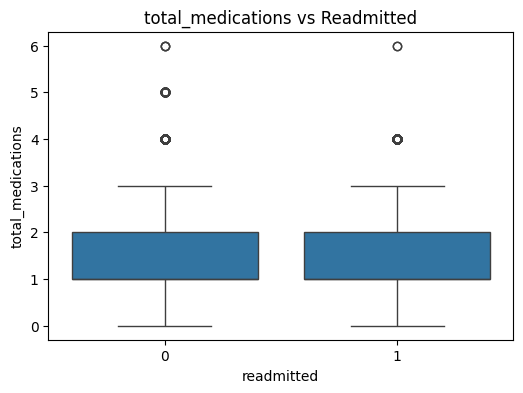

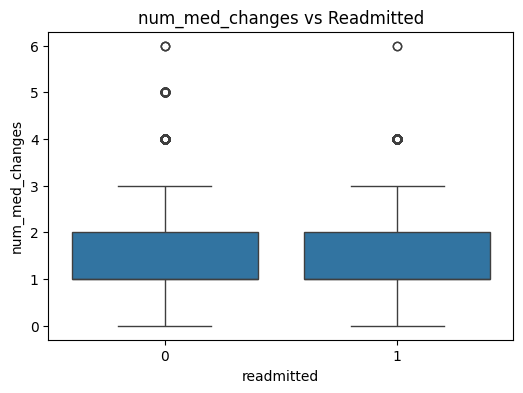

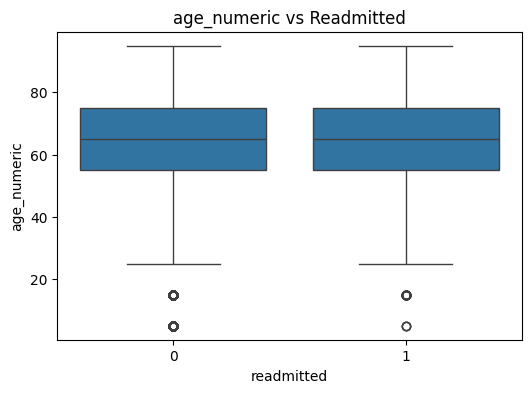

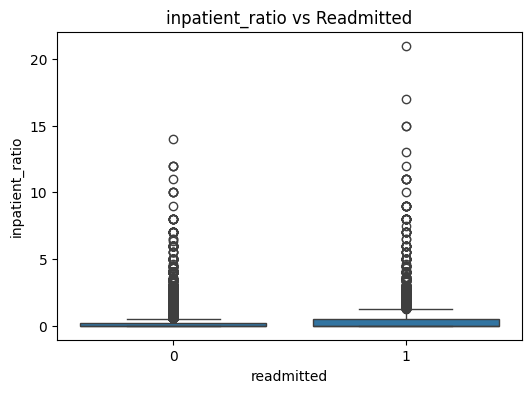

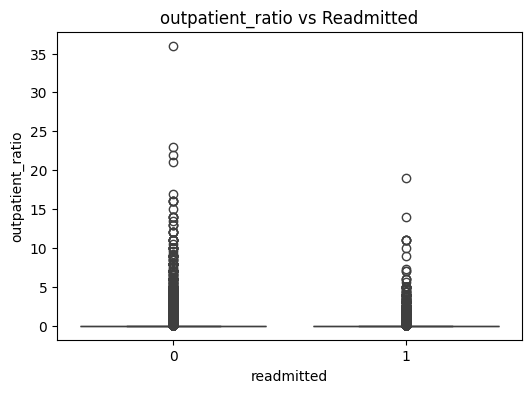

In [ ]:
# Visualizations
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='readmitted', y=col, data=df)
    plt.title(f'{col} vs Readmitted')
    plt.show()


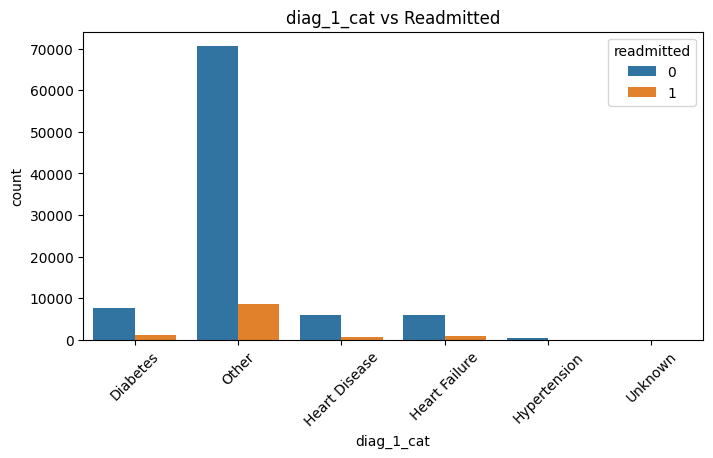

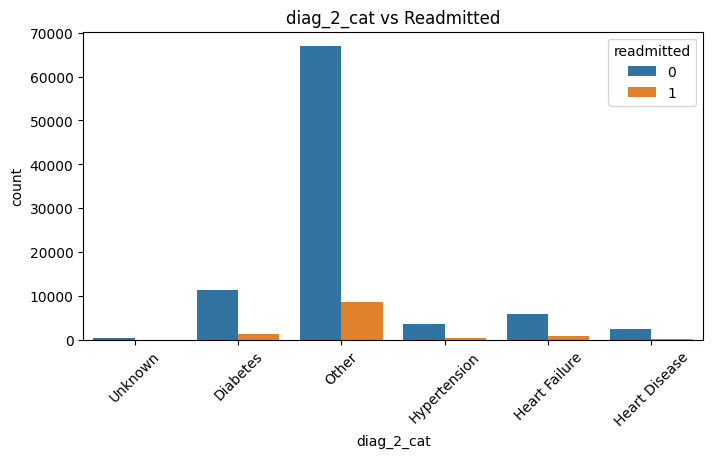

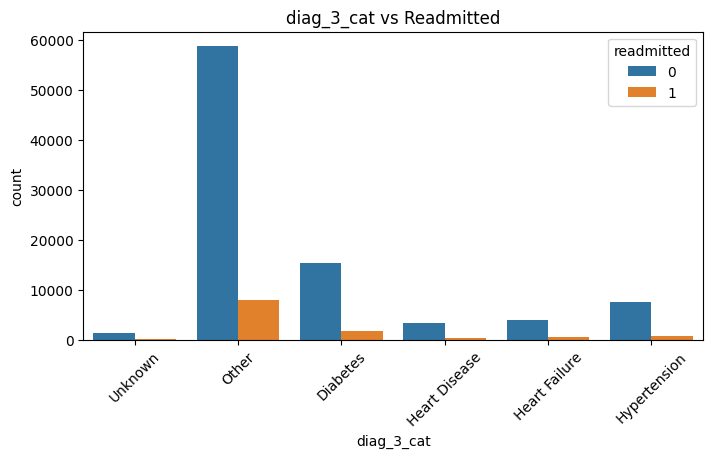

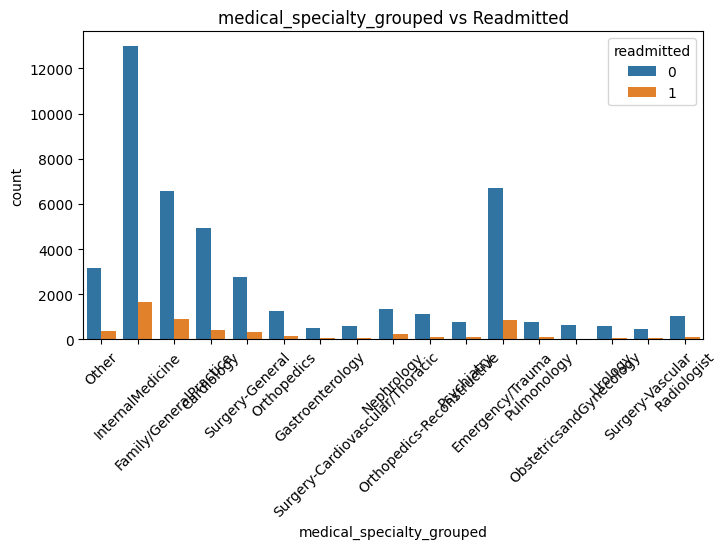

In [12]:
categorical_features = ['diag_1_cat', 'diag_2_cat', 'diag_3_cat', 'medical_specialty_grouped']

for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='readmitted', data=df)
    plt.title(f'{col} vs Readmitted')
    plt.xticks(rotation=45)
    plt.show()


In [15]:
lst = ['tolazamide', 'examide', 'citoglipton']
for med in lst:
    print(df[med].unique())


['No' 'Steady' 'Up']
['No']
['No']


In [16]:
processed_df = pd.read_csv("E:\Hospital_Readmission_Prediction\data\processed\preprocessed_data.csv")
processed_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\Dell\AppData\Local\Temp\ipykernel_30368\1711348112.py:1: SyntaxWarning: invalid escape sequence '\H'
  processed_df = pd.read_csv("E:\Hospital_Readmission_Prediction\data\processed\preprocessed_data.csv")


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,diag_2_cat_Heart Failure,diag_2_cat_Hypertension,diag_2_cat_Other,diag_3_cat_Heart Disease,diag_3_cat_Heart Failure,diag_3_cat_Hypertension,diag_3_cat_Other,total_medications,num_med_changes,numeric_age
0,2,0,[0-10),6,25,1,0.693147,16,37,3.737670,...,0,0,1,0,0,0,1,3.091042,0.0,5
1,2,0,[10-20),1,1,7,1.386294,16,71,4.094345,...,0,0,0,0,0,0,1,3.091042,0.0,15
2,0,0,[20-30),1,1,7,1.098612,16,71,2.484907,...,0,0,0,0,0,0,1,3.091042,0.0,25
3,2,1,[30-40),1,1,7,1.098612,16,71,3.806662,...,0,0,0,0,0,0,1,3.091042,0.0,35
4,2,1,[40-50),1,1,7,0.693147,16,71,3.951244,...,0,0,1,0,0,0,0,3.091042,0.0,45


In [18]:
processed_df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
                           ..
diag_3_cat_Hypertension     0
diag_3_cat_Other            0
total_medications           0
num_med_changes             0
numeric_age                 0
Length: 63, dtype: int64

In [32]:
for col in processed_df.select_dtypes(include=['object']).columns:
    print(f"{col}: {processed_df[col].nunique()} unique values")

age: 10 unique values
diag_1: 717 unique values
diag_2: 749 unique values
diag_3: 790 unique values
diag_1_cat: 5 unique values
diag_2_cat: 5 unique values
diag_3_cat: 5 unique values


In [33]:
processed_df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'diag_1_cat', 'diag_2_cat', 'diag_3_cat', 'diag_1_cat_Heart Disease',
       'diag_1_cat_Heart Failure', 'diag_1_cat_Hypertension',
       'diag_1_cat_Other', 

## testing pipeline 


In [1]:
import sys
sys.path.append('..')

In [6]:
from sklearn.linear_model import LogisticRegression
from src.utils.train_pipeline import train_pipeline
model = LogisticRegression(max_iter=1000)
data_path = "E:/Hospital_Readmission_Prediction/data/processed/preprocessed_data.csv"

lr_pipe, results, (y_test, y_pred, y_proba) = train_pipeline(data_path, model)

{'Model': 'LogisticRegression', 'F1 Score': 0.2525700463616206, 'ROC-AUC': np.float64(0.6408941992723493), 'Precision': 0.8341150571324965, 'Recall': 0.6356490124791195, 'Accuracy': 0.6356490124791195, 'Confusion Matrix': [[11685, 6384], [1032, 1253]]}


- Pipeline works completely

In [4]:
from src.utils.visualizer import plot_roc_curve, plot_confusion_matrix

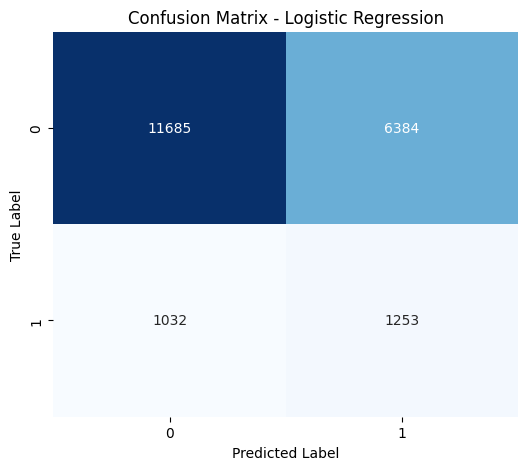

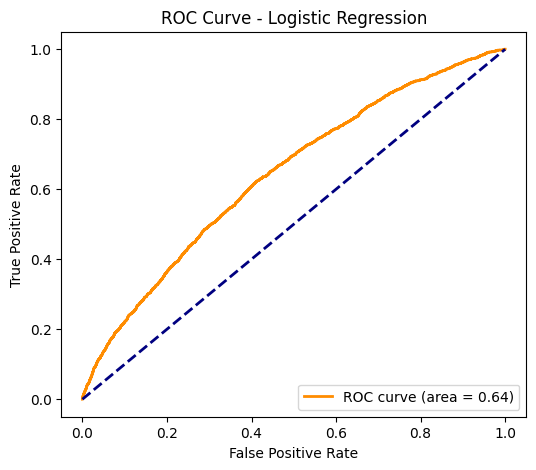

In [7]:
plot_confusion_matrix(y_test, y_pred, model_name="Logistic Regression")

if y_proba is not None:
    plot_roc_curve(y_test, y_proba, model_name="Logistic Regression")

- visualizer functions work porperly 

## Feature Importance Interpretation for Best model (Random forest)

In [5]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')

# Load the saved model
rf_tuned = joblib.load(r"E:\Hospital_Readmission_Prediction\models\tuned_random_forest_model.pkl")

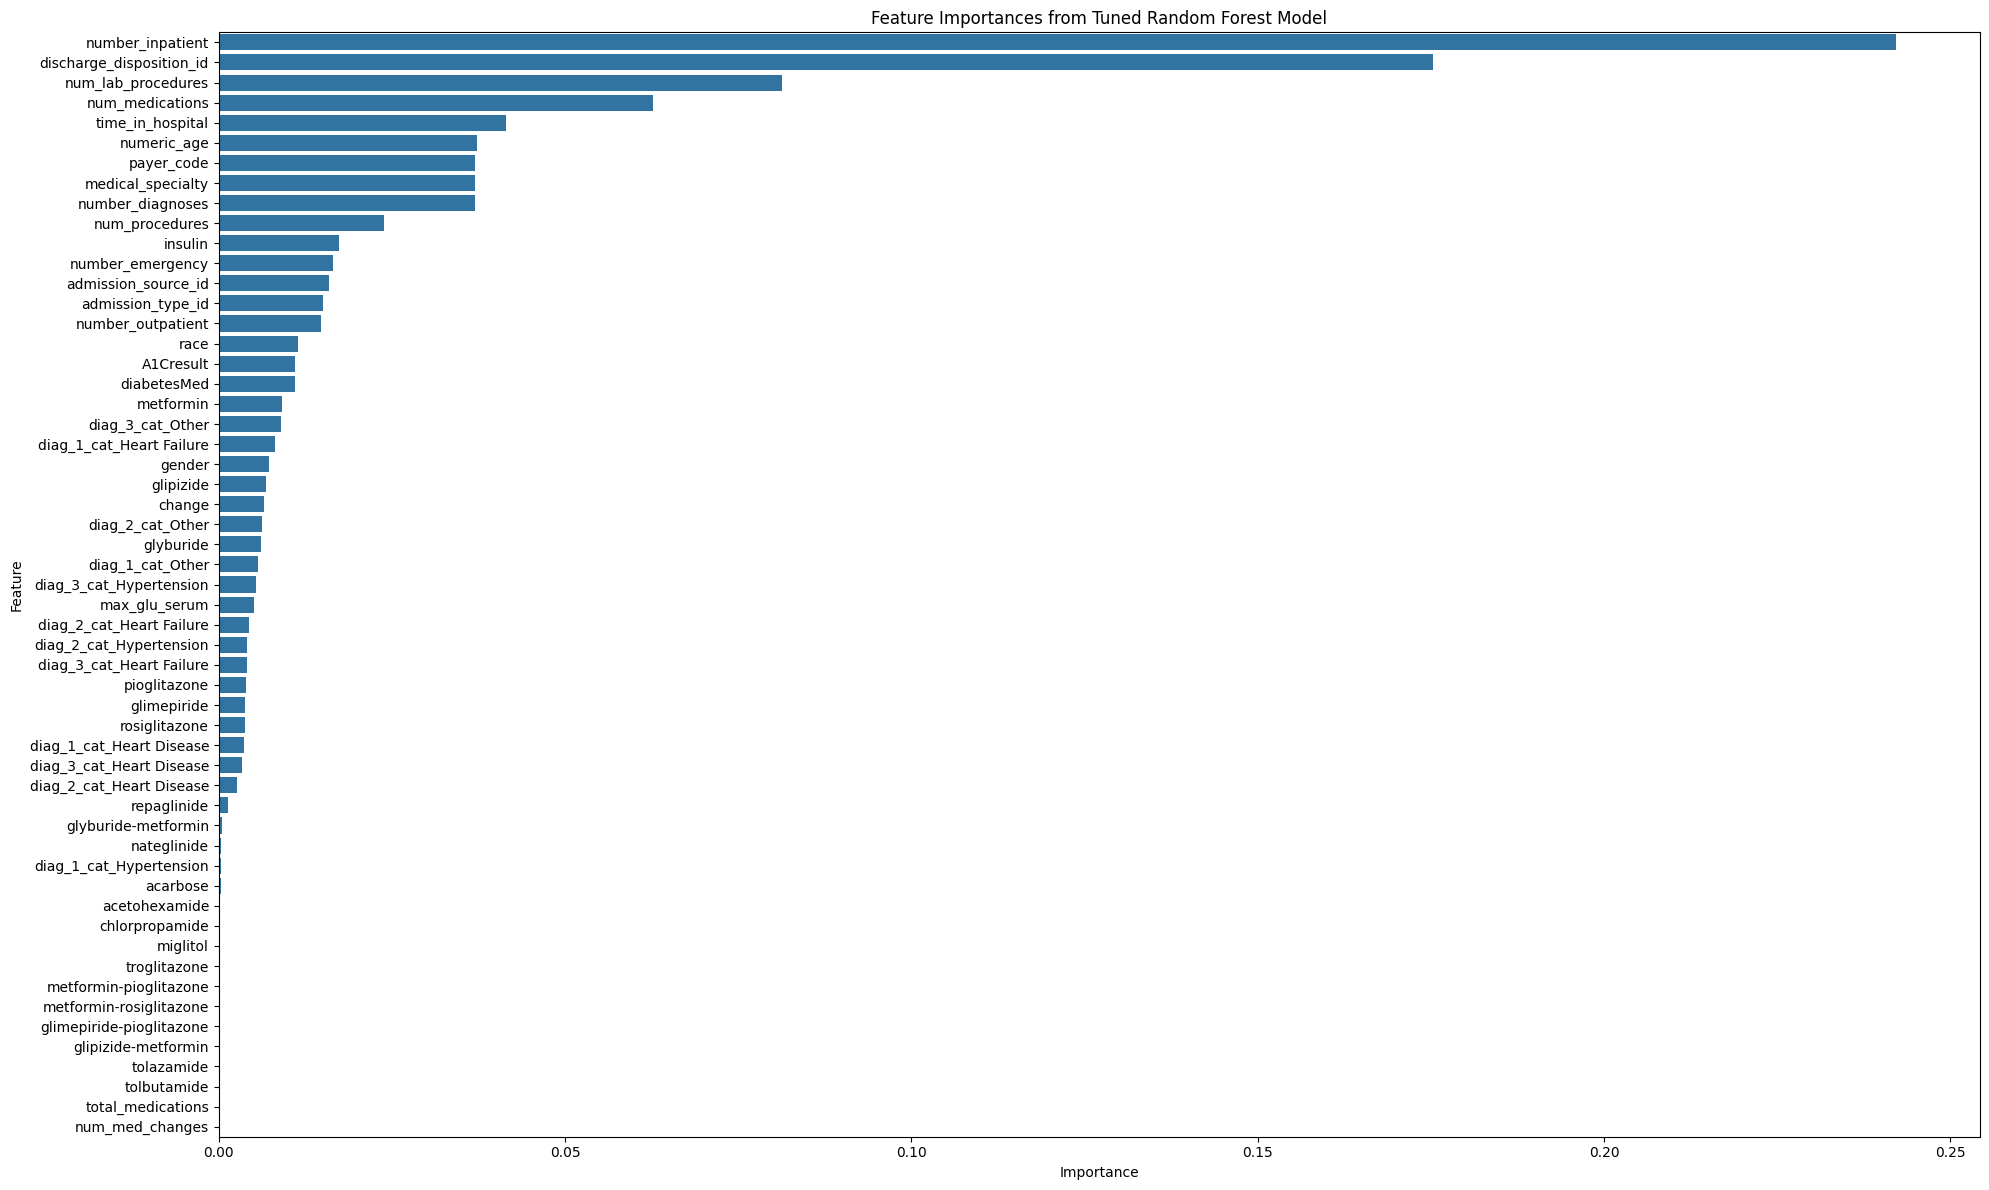

In [7]:
from src.utils.data_loader import load_data, split_X_y
# Loading data for feature importance
data_path = "E:/Hospital_Readmission_Prediction/data/processed/preprocessed_data.csv"
data = load_data(data_path)
X, y = split_X_y(data)

feature_names = X.columns
importances = rf_tuned.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20,12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Tuned Random Forest Model')
plt.tight_layout()
plt.show()

### Interpretation of Key Predictive Factors

- The tuned Random Forest model indicates that prior hospitalization and discharge outcomes are the most influential factors for predicting patient readmission.

- Specifically, number_inpatient and discharge_disposition_id emerge as the strongest predictors, suggesting that patients with multiple past admissions or certain discharge dispositions are at higher risk of being readmitted.

- Moderately important variables include num_lab_procedures, num_medications, and time_in_hospital, reflecting that the intensity and duration of treatment also influence readmission.

- Demographic and coded variables such as age, payer_code, and medical_specialty provide additional but limited predictive value.

- Most individual medication indicators contribute minimally, indicating that overall treatment complexity matters more than any single prescribed medication.